In [3]:
import random
import numpy as np

random.seed(12400)

nClusters = 5
clusters = range(nClusters)
tolerance = 0.2

costexp = 30
coststdd = 30

cost = [[0 for c1 in range(nClusters)] for c2 in range(nClusters)]
for c1 in range(nClusters):
    for c2 in range(c1+1, nClusters):
        cost[c1][c2] = max(round(random.gauss(costexp, coststdd),2),0)
        cost[c2][c1] = cost[c1][c2]
cost = np.array(cost)

# cost = np.array([[0., 1.], [1.,0.]])

print(cost)

[[ 0.   23.18 59.49 27.1  44.87]
 [23.18  0.    0.   81.04 80.69]
 [59.49  0.    0.   22.33 30.74]
 [27.1  81.04 22.33  0.   19.97]
 [44.87 80.69 30.74 19.97  0.  ]]


In [4]:
import igraph as ig
# import erdosrenyi as gdat
import data.testgraph3 as gdat
from data.graph_generator import *
from LP import partitionLP

nData = 15
nTasks = 7
edgeProb = 0.2


outgoingEdges = 2

avgDataDep = 4
stddDataDep = 1.5

g = gdat.g
# g = generate_barabasi(nData + nTasks, outgoingEdges)
g = generate_realistic(nData, nTasks, avgDataDep, stddDataDep)
# ig.plot(g)
color_dict_vertex = {0: "blue", 1: "red", 2: "green", 3: "pink", 4: "orange" }
(placement, visual_style) = partitionLP(cost, nClusters, g, tolerance, color_dict_vertex, relaxed=1)

Number of variables = 810
Number of constraints = 2127
Optimal objective value = 57

Placement:
Total cost: 57.0451


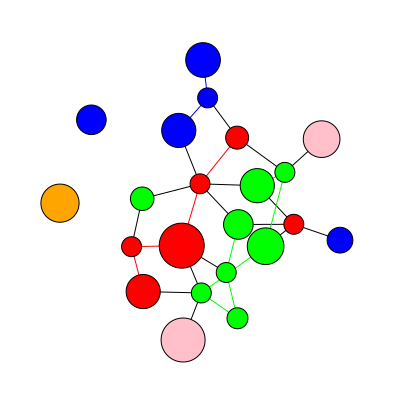

In [5]:
visual_style["vertex_size"] = 20
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 60

volumes = g.vs["volume"]
maxVolume = max(volumes)
visual_style["vertex_size"] = [20 + volumes[i]*50/(2*maxVolume) for i in range(len(g.vs))]

ig.plot(g, **visual_style)